In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
# Add in data augmentation to avoid overfitting
transform = transforms.Compose(
    [transforms.RandomResizedCrop(32),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


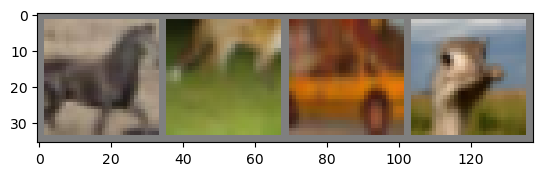

horse dog   car   bird 


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F

# Use multiple layers alongside convolution layers beforehand to transition from input to 110 neurons to 74 neurons to 10 neurons
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 110)
        self.fc2 = nn.Linear(110, 74)
        self.fc3 = nn.Linear(74, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
# Lists to store metrics for plotting
loss_metric = []
training_accuracy = []
test_accuracy = []

In [8]:
for epoch in range(50):  # loop over the dataset multiple times

    # Statistics
    correct = 0
    total = 0
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics and calculate accuracy
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Record the training accuracy and loss
    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = correct / total
    loss_metric.append(epoch_loss)
    training_accuracy.append(epoch_accuracy)

    # Record the testing accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    test_accuracy.append(acc)

print('Finished Training')

[1,  2000] loss: 2.271
[1,  4000] loss: 2.079
[1,  6000] loss: 1.951
[1,  8000] loss: 1.892
[1, 10000] loss: 1.854
[1, 12000] loss: 1.812
[2,  2000] loss: 1.793
[2,  4000] loss: 1.773
[2,  6000] loss: 1.768
[2,  8000] loss: 1.740
[2, 10000] loss: 1.739
[2, 12000] loss: 1.729
[3,  2000] loss: 1.718
[3,  4000] loss: 1.688
[3,  6000] loss: 1.702
[3,  8000] loss: 1.702
[3, 10000] loss: 1.700
[3, 12000] loss: 1.672
[4,  2000] loss: 1.658
[4,  4000] loss: 1.669
[4,  6000] loss: 1.673
[4,  8000] loss: 1.656
[4, 10000] loss: 1.637
[4, 12000] loss: 1.602
[5,  2000] loss: 1.620
[5,  4000] loss: 1.612
[5,  6000] loss: 1.627
[5,  8000] loss: 1.630
[5, 10000] loss: 1.624
[5, 12000] loss: 1.612
[6,  2000] loss: 1.581
[6,  4000] loss: 1.582
[6,  6000] loss: 1.621
[6,  8000] loss: 1.607
[6, 10000] loss: 1.579
[6, 12000] loss: 1.583
[7,  2000] loss: 1.571
[7,  4000] loss: 1.586
[7,  6000] loss: 1.579
[7,  8000] loss: 1.568
[7, 10000] loss: 1.583
[7, 12000] loss: 1.577
[8,  2000] loss: 1.568
[8,  4000] 

In [9]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

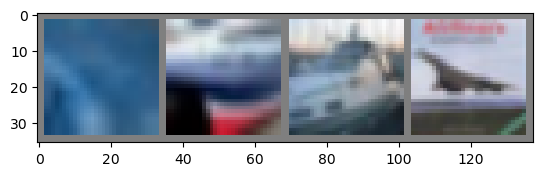

GroundTruth:  cat   ship  ship  plane


In [10]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [11]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [12]:
outputs = net(images)

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  plane car   ship  plane


In [14]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 48 %


In [15]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 63.1 %
Accuracy for class: car   is 63.6 %
Accuracy for class: bird  is 32.8 %
Accuracy for class: cat   is 33.6 %
Accuracy for class: deer  is 49.4 %
Accuracy for class: dog   is 44.9 %
Accuracy for class: frog  is 55.0 %
Accuracy for class: horse is 39.5 %
Accuracy for class: ship  is 50.8 %
Accuracy for class: truck is 47.0 %


In [16]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


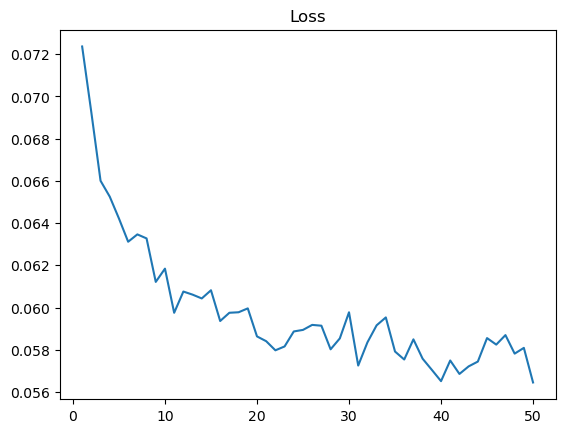

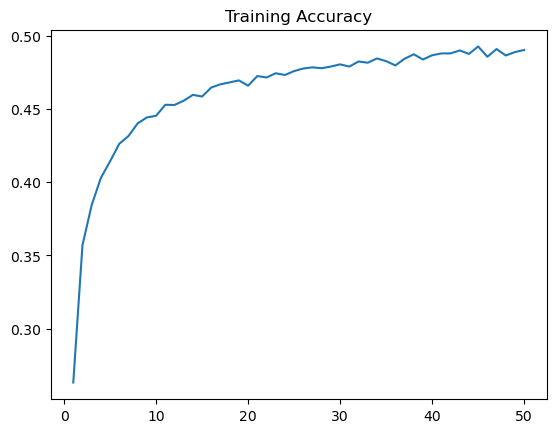

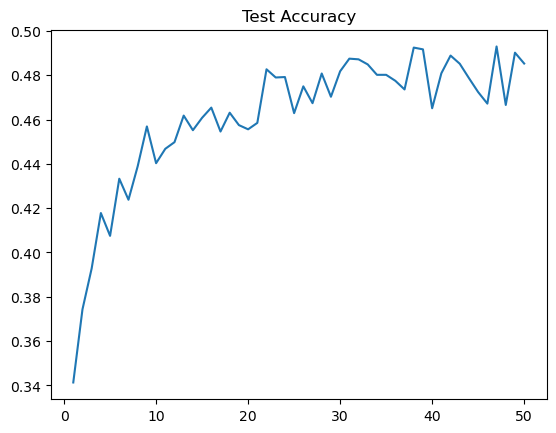

In [17]:
# Plotting the results
epochs = range(1, 51)

plt.plot(epochs, loss_metric)
plt.title('Loss')
plt.show()

plt.plot(epochs, training_accuracy)
plt.title('Training Accuracy')
plt.show()

plt.plot(epochs, test_accuracy)
plt.title('Test Accuracy')
plt.show()

In [18]:
del dataiter